In [26]:
import numpy                    as np
import pandas                   as pd
import matplotlib.pyplot        as plt 
import seaborn                  as sns
import plotly.express           as px
import scipy.stats              as stats
import missingno                as msno
from   sklearn.linear_model     import LinearRegression
from   sklearn.tree             import DecisionTreeRegressor
from   sklearn.ensemble         import RandomForestRegressor
from   sklearn.svm              import SVR
from   sklearn.model_selection  import train_test_split
from   sklearn.model_selection  import KFold
from   sklearn.preprocessing    import OneHotEncoder
from   sklearn.metrics          import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
train = train.drop(['Alley','PoolQC','Fence','MiscFeature'] , axis = 1)
test = test.drop(['Alley','PoolQC','Fence','MiscFeature'] , axis = 1)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# TRAIN CLEANING

In [35]:
train.isnull().sum()[train.isnull().sum()>0]
# total cols containig null values = 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
#     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
#        'GarageQual', 'GarageCond'

# train numerical cols containing null vals = 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'

# train cateogrical cols containing null vals = 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
#        'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [7]:
px.box(train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']])

In [20]:
def RepMean(df , cols):
    for col in cols:
        df[col].replace(to_replace=np.nan , value=df[col].mean(),inplace = True)
        
def RepMedian(df , cols):
    for col in cols:
        df[col].replace(to_replace=np.nan , value=df[col].median(),inplace = True)
        
def RepMostFreq(df , cols):
    for col in cols:
        df[col].replace(to_replace=np.nan , value=df[col].mode()[0],inplace = True)

In [21]:
RepMedian(train,['LotFrontage', 'MasVnrArea'])
RepMean(train,['GarageYrBlt'])
RepMostFreq(train,['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'])

In [37]:
train[['LotFrontage', 'MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


# TEST CLEANING

In [40]:
test.isnull().sum()[test.isnull().sum()>0]
# total cols having null values = 'MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
#        'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
#        'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
#        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
#        'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
#        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
#        'SaleType'

# total numerical cols having null vals = 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
#        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
#        'GarageCars', 'GarageArea'

# total categorical cols having null vals = 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
#        'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
FireplaceQu     730
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [41]:
px.box(train[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']])

In [42]:
# median - 'LotFrontage','MasVnrArea','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF' , 'GarageArea']
# mean - 'BsmtFinSF1','BsmtFullBath','BsmtHalfBath' , 'GarageYrBlt' , 'GarageCars'

In [43]:
RepMedian(test,['LotFrontage','MasVnrArea','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF' , 'GarageArea'])
RepMean(test,['BsmtFinSF1','BsmtFullBath','BsmtHalfBath' , 'GarageYrBlt' , 'GarageCars'])
RepMostFreq(test,['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'])

# CORRELATION

In [79]:
px.imshow(train.corr())

In [1]:
fig = px.imshow(train.corr()[train.corr()>=.5],text_auto='.2f',zmin = -1 , zmax = 1)
fig.layout.height = 600
fig.layout.width = 800
fig.show()

NameError: name 'px' is not defined

In [45]:
# x = [['OverallQual','YrBuilt','YearRemodAdd','FullBath','TotRmsAbvGrd','1stFlrSF','TotalBsmtSF','GrLivArea',
# 'GarageArea','GarageCars']]

# y = SalePrice   

In [46]:
# col_n = train.select_dtypes('number').columns
# fig, axes = plt.subplots(nrows = 8 , ncols = 5)    # axes is 2d array (3x3)
# axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(30,15)
# for ax, col_n in zip(axes, col_n):
#     sns.distplot(train[col_n], ax = ax)
#     ax.set_title(col_n)

# Dist Plots

In [70]:
# px.scatter(train,'LotArea','SalePrice')

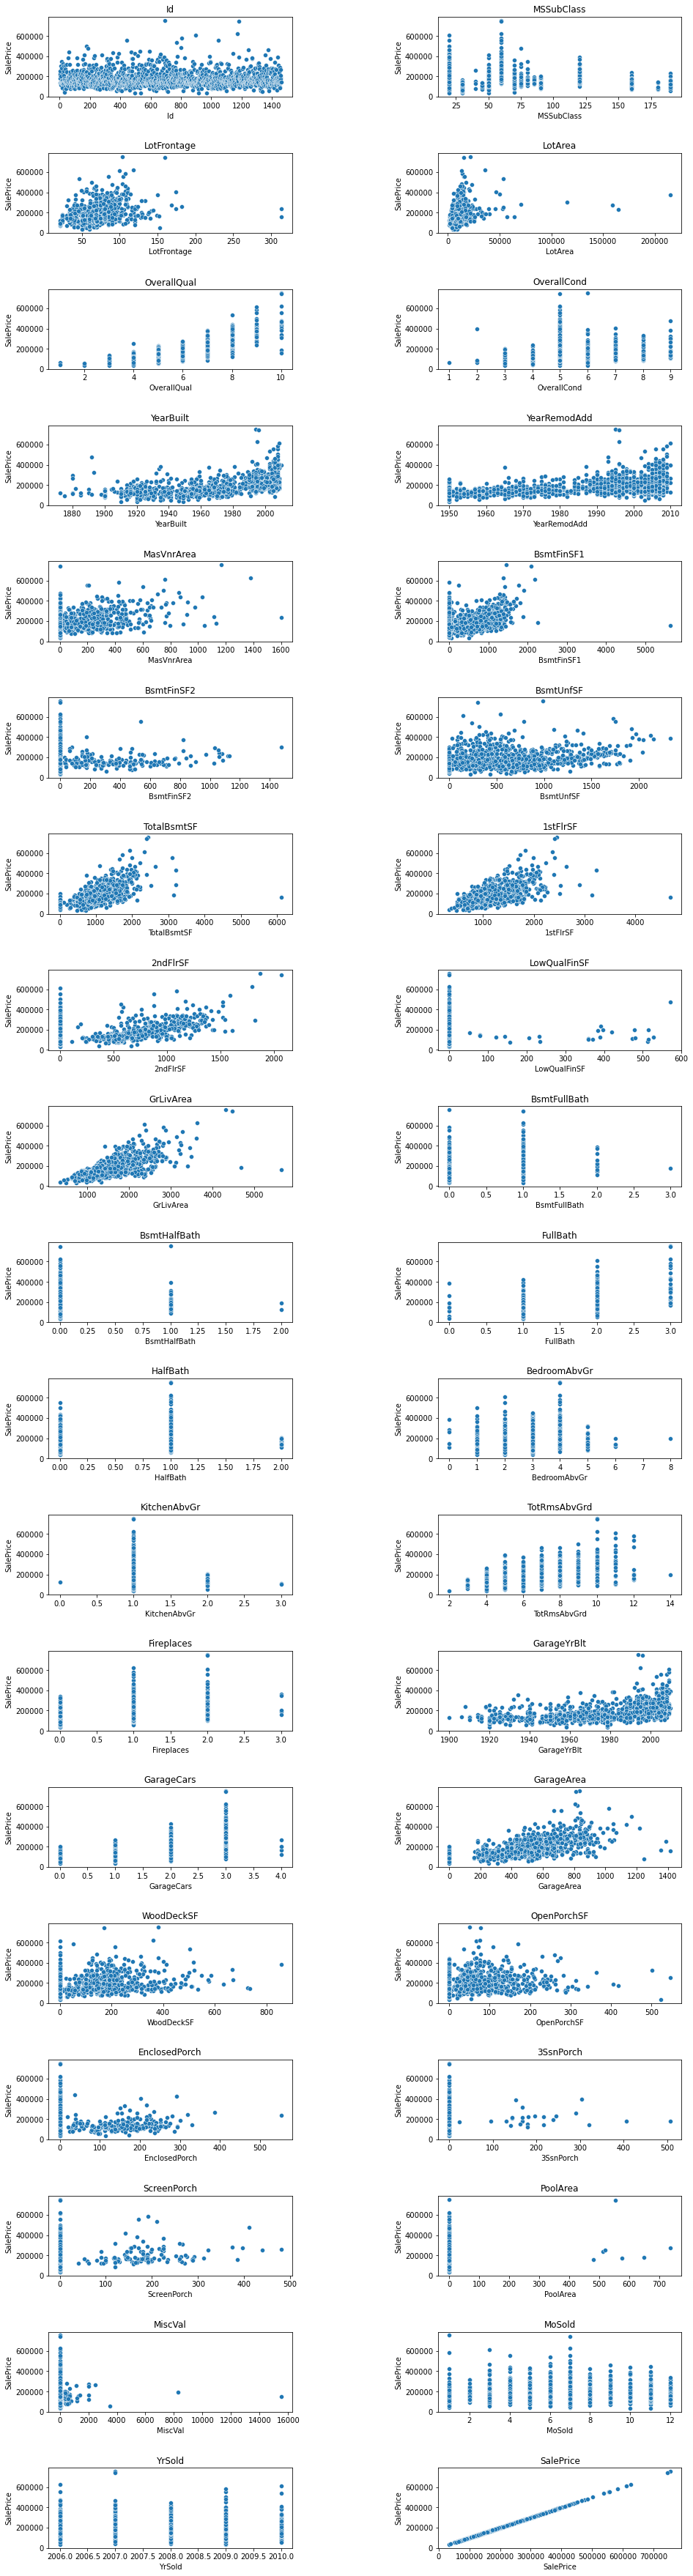

In [73]:
col_n = train.select_dtypes('number').columns
fig, axes = plt.subplots(nrows = 19 , ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15,60)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.7)
for ax, col_n in zip(axes, col_n):
#     sns.distplot(train[col_n], ax = ax)
    sns.scatterplot(x = train[col_n] , y = train.SalePrice,ax = ax)
    ax.set_title(col_n)
    
#     'OverallQual','YrBuilt','YearRemodAdd','FullBath','TotRmsAbvGrd','1stFlrSF','TotalBsmtSF','GrLivArea',
# 'GarageArea','GarageCars'

# Q-Q Plots

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([  0,   0,   0, ..., 502, 523, 547], dtype=int64)),
 (56.55777942489492, 46.660273972602745, 0.8522156776043671))

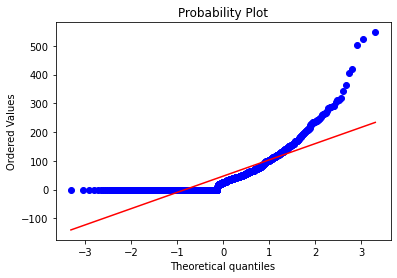

In [55]:
stats.probplot(train.OpenPorchSF,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 1356, 1390, 1418], dtype=int64)),
 (211.49987133996856, 472.98013698630143, 0.9875864811659538))

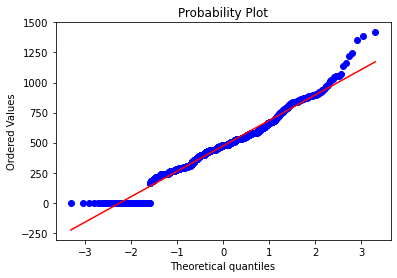

In [54]:
stats.probplot(train.GarageArea,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([1900., 1906., 1908., ..., 2010., 2010., 2010.])),
 (23.1688929719632, 1978.5061638868744, 0.9639946773862572))

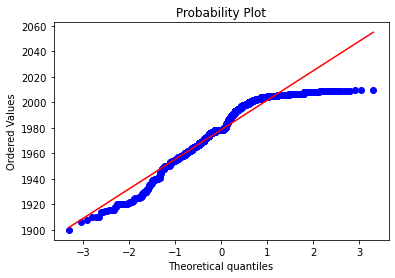

In [53]:
stats.probplot(train.GarageYrBlt,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 334,  438,  480, ..., 4476, 4676, 5642], dtype=int64)),
 (506.68155082490534, 1515.463698630137, 0.9626338898809194))

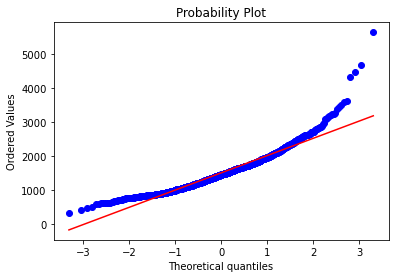

In [52]:
stats.probplot(train.GrLivArea,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 1818, 1872, 2065], dtype=int64)),
 (383.0140445964423, 346.9924657534247, 0.8759609057950275))

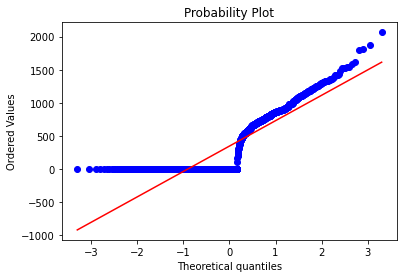

In [51]:
stats.probplot(train['2ndFlrSF'],dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 334,  372,  438, ..., 3138, 3228, 4692], dtype=int64)),
 (372.48445992436774, 1162.626712328767, 0.9619281806000767))

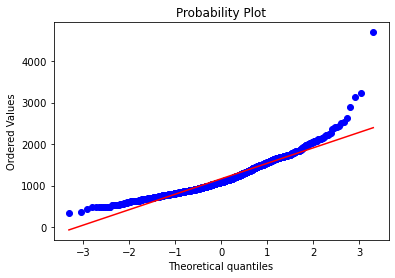

In [49]:
stats.probplot(train['1stFlrSF'],dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 3200, 3206, 6110], dtype=int64)),
 (420.2949602109553, 1057.4294520547944, 0.9564534567679274))

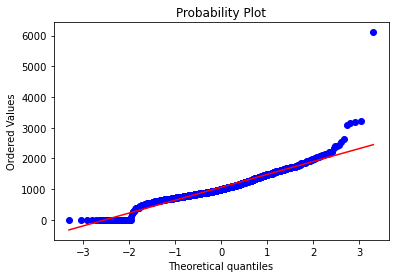

In [48]:
stats.probplot(train.TotalBsmtSF,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 2121, 2153, 2336], dtype=int64)),
 (427.0455395900818, 567.2404109589042, 0.9648620606089062))

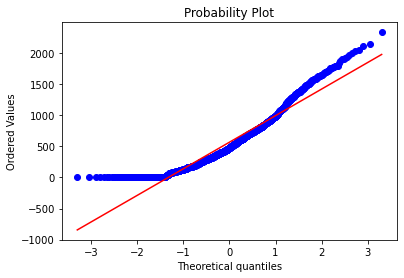

In [47]:
stats.probplot(train.BsmtUnfSF,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0,    0,    0, ..., 2188, 2260, 5644], dtype=int64)),
 (420.2432616611508, 443.63972602739733, 0.9198670621306485))

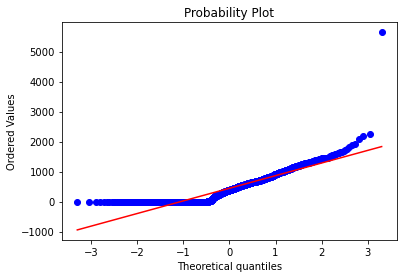

In [44]:
stats.probplot(train.BsmtFinSF1,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([   0.,    0.,    0., ..., 1170., 1378., 1600.])),
 (144.4207681700668, 103.11712328767126, 0.7977717731565659))

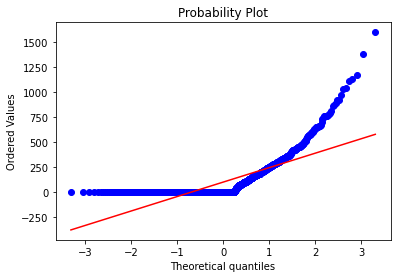

In [43]:
stats.probplot(train.MasVnrArea,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([1872, 1875, 1880, ..., 2009, 2009, 2010], dtype=int64)),
 (29.11856981361246, 1971.267808219178, 0.962507010936179))

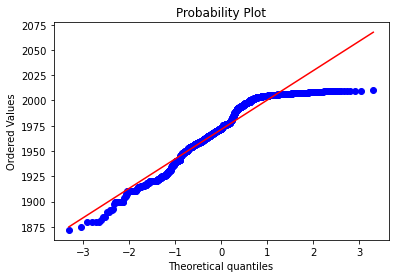

In [42]:
stats.probplot(train.YearBuilt,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([  1300,   1477,   1491, ..., 159000, 164660, 215245], dtype=int64)),
 (5888.761357966362, 10516.828082191783, 0.589007650490991))

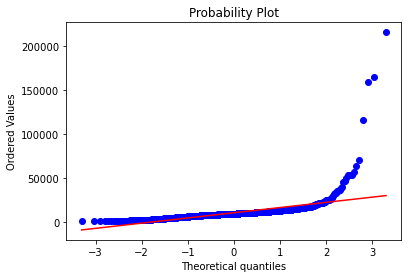

In [39]:
stats.probplot(train.LotArea,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 21.,  21.,  21., ..., 182., 313., 313.])),
 (20.311765256388586, 69.86369863013698, 0.9205799915626641))

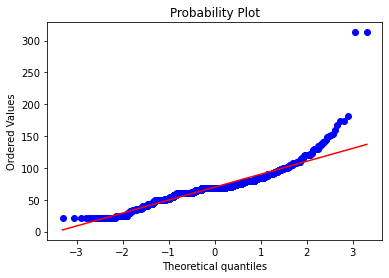

In [38]:
stats.probplot(train.LotFrontage,dist = stats.norm , fit = stats.norm, plot = plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

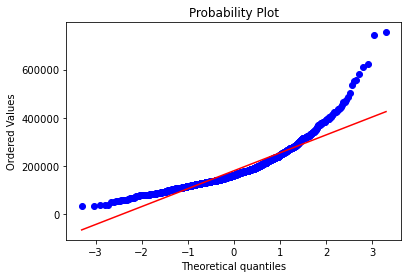

In [23]:
# col_n = train.select_dtypes('number').columns

stats.probplot(train.SalePrice,dist = stats.norm , fit = stats.norm, plot = plt)